# Problem set from week 2 semester 2

## Problem #1

Company claims faulty rate of screen population is 5%. Test if this claim is true.

100 monitors to test. $t_{cut}=9$ is maximum number of faulty monitors that we are willing to have and still accept that the manufacturer's claim is true.

a) What is significance level $\alpha$ of the chosen threshold?

b) What is the probability $\beta$ of a Type II error if the true faulty rate is 15%?

use pmf from scipy.stats.binom

In [128]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import scipy.integrate

SO Type-I error you can calculate $\alpha$ at the integral of the background up to the $t_{cut}$ value.

In [16]:
n = 100
p = 0.05
r = [0,1,2,3,4,5,6,7,8,9]
dist = scipy.stats.binom.pmf(r, n, p)
# Probability that you accept the null hypothesis and its true
sum_dist = np.sum(dist)

# So 1-P to get Type I error
null_hyp = 1-sum_dist

print("Significance Value: {:.4f}%".format(null_hyp*100))
print("Probability to say these monitors arent faulty when they are.")

Significance Value: 2.8188%
Probability to say these monitors arent faulty when they are.


And now onto B), with the Type-II error with true faulty rate of 15%

H0 -> true: Probability that there isnt a fault in the computers even when there is

H0 -> false: Probability that there is a fault even when there isnt

In [17]:
# faulty rate
n = 100
p = 0.15
r = [0,1,2,3,4,5,6,7,8,9]
t2_dist = scipy.stats.binom.pmf(r, n, p)
sum_t2_dist = np.sum(t2_dist)
# 1-P to get true value (9->100 rather than 0->9)
h2_hyp = sum_t2_dist

print("Beta: {:.4f}%".format(h2_hyp*100))
print("Probability to say these monitors are faulty when they aren't.")

Beta: 5.5095%
Probability to say these monitors are faulty when they aren't.


## Problem #2

ToF system designed to separate kaons from pions consists of two scintillation counters that are a distance L = 20m apart.

resolution of our scintillators is $\sigma = 400ps$, so times reported by system follows a Gaussian distribution with mean t and width $\sigma$

In [117]:
# Setting values, setting c=1
L = 66.6666 # ns
sigma = 0.4 # ns
k_mass = 493.7 # MeV
p_mass = 139.6 # MeV
# pion and kaon momenta
p_momenta = 3000 # MeV
k_momenta = 3000 # MeV



# creating t function
def t_definition(mass, momenta, L):
    t = L * np.power(1+(mass/momenta)**2,0.5)
    return t

In [134]:
# create gaussian class that calcs integral between arbitrary point xval and +-infinity, with two methods
class Gaussian:
    def __init__(self, mean, sigma, cut):
        self.mean = mean
        self.sigma = sigma
        self.xmin = xmin
        self.xmax = xmax
        self.cut = cut
    
    def gauss(self, x):
        # define the gaussian
        y = np.exp(-np.power(x - self.mean, 2.) / (2 * np.power(self.sigma, 2.)))  *1/(np.power(2*np.pi*self.sigma, 0.5))
        return y
    
    def integralAbove(self):
        # integral above the cut
        return scipy.integrate.quad(self.gauss, self.cut, self.xmax)[0]
        
        
    def integralBelow(self):
        return scipy.integrate.quad(self.gauss, self.xmin, self.cut)[0]

In [135]:
# Set xmin and xmax here (time)
xmin = 0
xmax = np.inf

Create ROC class that calculates a_i and B_i pairs of TOF performance for distinguishing between pions and kaons for a given momentum p and an arbitrary threshold t_i cut. Use the class to produce 100 performance points evenly spaced between the average travel time for kaons and pions.

In [136]:
class ROC:
    def __init__(self, cut, mean, sigma):
        self.cut = cut
        self.mean = mean
        self.sigma = sigma
    
    # Calculates the significance level
    def significance(self):
        sigval = Gaussian(self.mean, self.sigma, self.cut)
        significance_val = sigval.integralBelow()
        return significance_val
    
    # Calculate the type 2 error (beta value)
    def beta_calc(self):
        sigval = Gaussian(self.mean, self.sigma, self.cut)
        beta_val = sigval.integralAbove()
        return beta_val
    
    

In [137]:
# testing functionality
object = ROC(500, 700, 400)
value = object.significance()
print(value)

5.369567637243396


In [141]:
# calculate mean for our object
p_mean = t_definition(p_mass, p_momenta, L)
k_mean = t_definition(k_mass, k_momenta, L)

p_obj = ROC(68, p_mean, sigma)
k_obj = ROC(68, k_mean, sigma)

print(p_obj.significance())
print(k_obj.beta_calc())

0.6319447679840061
0.08694740712651344


In [145]:
# Create graph of changing beta and alpha values within range 66 and 68
t_space = np.linspace(66, 68, 100)

p_alpha_3gev = []
p_alpha_6gev = []
p_alpha_9gev = []

p_beta_3gev = []
p_beta_6gev = []
p_beta_9gev = []

k_alpha_3gev = []
k_alpha_6gev = []
k_alpha_9gev = []

k_beta_3gev = []
k_beta_6gev = []
k_beta_9gev = []


# define the t values for each momenta

p_mean = []
p_mean.append(t_definition(p_mass, 3000, L))
p_mean.append(t_definition(p_mass, 6000, L))
p_mean.append(t_definition(p_mass, 9000, L))

k_mean = []
k_mean.append(t_definition(k_mass, 3000, L))
k_mean.append(t_definition(k_mass, 6000, L))
k_mean.append(t_definition(k_mass, 9000, L))

for i in range(len(t_space)):
    
    # p loop for difference momenta
    for j in range(len(p_mean)):
        p_obj = ROC(t_space[i], p_mean[j], sigma)
        # separate into correct sections
        if j==0:
            p_alpha_3gev.append(p_obj.significance())
            p_beta_3gev.append(p_obj.beta_calc())
        elif j==1:
            p_alpha_6gev.append(p_obj.significance())
            p_beta_6gev.append(p_obj.beta_calc())
        elif j==2:
            p_alpha_9gev.append(p_obj.significance())
            p_beta_9gev.append(p_obj.beta_calc())
        
for i in range(len(t_space)):
    
    # k loop for difference momenta
    for j in range(len(k_mean)):
        k_obj = ROC(t_space[i], k_mean[j], sigma)
        # separate into correct sections
        if j==0:
            k_alpha_3gev.append(k_obj.significance())
            k_beta_3gev.append(k_obj.beta_calc())
        elif j==1:
            k_alpha_6gev.append(k_obj.significance())
            k_beta_6gev.append(k_obj.beta_calc())
        elif j==2:
            k_alpha_9gev.append(k_obj.significance())
            k_beta_9gev.append(k_obj.beta_calc())

                   


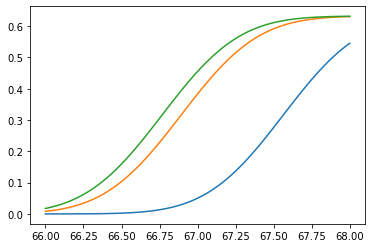

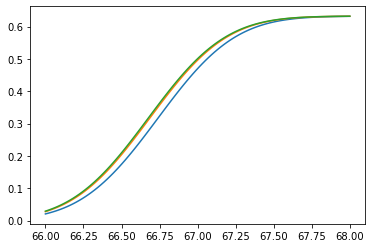

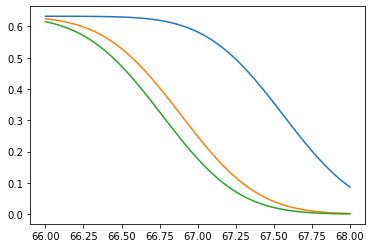

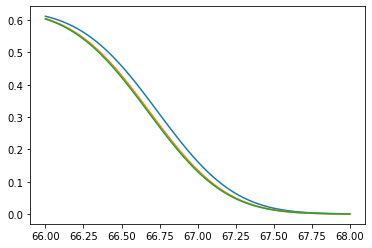

In [146]:
# Plot the results
plt.plot(t_space, k_alpha_3gev)
plt.plot(t_space, k_alpha_6gev)
plt.plot(t_space, k_alpha_9gev)
plt.show()

plt.plot(t_space, p_alpha_3gev)
plt.plot(t_space, p_alpha_6gev)
plt.plot(t_space, p_alpha_9gev)
plt.show()



plt.plot(t_space, k_beta_3gev)
plt.plot(t_space, k_beta_6gev)
plt.plot(t_space, k_beta_9gev)
plt.show()

plt.plot(t_space, p_beta_3gev)
plt.plot(t_space, p_beta_6gev)
plt.plot(t_space, p_beta_9gev)
plt.show()

This is with the hypothesis that it is a pion or isn't, rather than it is a pion but its a kaon, or vice versa. Need to change where the integrals are defined.

So need to change it within the ROC definition. Pion is lighter than kaon. Pion is first gaussian in time then and Kaon is later, so you have a cutoff time for the pion and kaon (one side pion, one side kaon). 

alpha is prob of saying its a kaon when its a pion

beta is prob of saying its a pion when its a kaon

